In [2]:
import pandas as pd

df = pd.read_csv("augmented_squadv2.csv")
len(df)

820401

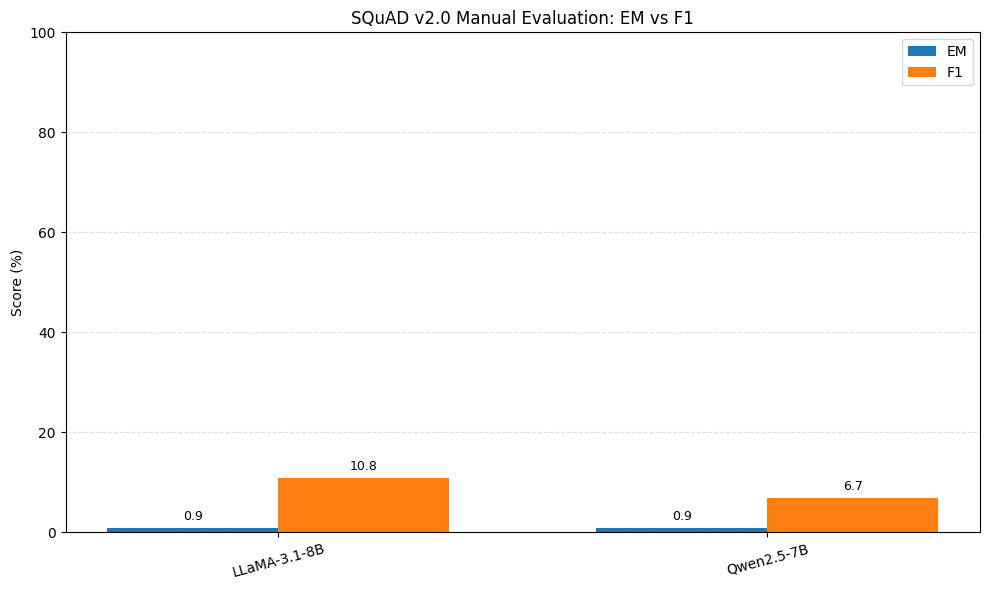

In [ ]:
import os, json, re, string
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

results_dir = "results"
files = {
    "Qwen2.5-7B": "predictions_techqa_llama.jsonl",
    "LLaMA-3.1-8B": "predictions_techqa_qwen.jsonl"
}
csv_out = "squadv2_metrics_em_f1.csv"

def normalize_answer(s: str) -> str:
    if s is None:
        return ""
    s = s.lower()
    exclude = set(string.punctuation)
    s = "".join(ch for ch in s if ch not in exclude)
    s = re.sub(r"\b(a|an|the)\b", " ", s)
    s = " ".join(s.split())
    return s

def f1_score(prediction: str, ground_truth: str) -> float:
    pred = normalize_answer(prediction).split()
    gold = normalize_answer(ground_truth).split()
    if len(gold) == 0 and len(pred) == 0:
        return 1.0
    if len(gold) == 0 or len(pred) == 0:
        return 0.0
    common = defaultdict(int)
    for t in gold:
        common[t] += 1
    num_same = 0
    for t in pred:
        if common[t] > 0:
            num_same += 1
            common[t] -= 1
    if num_same == 0:
        return 0.0
    precision = num_same / len(pred)
    recall = num_same / len(gold)
    return 2 * precision * recall / (precision + recall)

def exact_match_score(prediction: str, ground_truth: str) -> int:
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                yield json.loads(line)

def evaluate_file(jsonl_path: str):
    total = 0
    em_sum = 0
    f1_sum = 0.0
    for ex in read_jsonl(jsonl_path):
        pred = ex.get("predicted_answer", "")
        gold = ex.get("gold_answer", "")
        em_sum += exact_match_score(pred, gold)
        f1_sum += f1_score(pred, gold)
        total += 1
    if total == 0:
        return {"exact": 0.0, "f1": 0.0, "total": 0}
    return {
        "exact": 100.0 * em_sum / total,
        "f1": 100.0 * (f1_sum / total),
        "total": total
    }

rows = []
for model, fname in files.items():
    path = os.path.join(results_dir, fname)
    if os.path.exists(path):
        res = evaluate_file(path)
        rows.append({"model": model, "EM": res["exact"], "F1": res["f1"], "total": res["total"]})
    else:
        rows.append({"model": model, "EM": None, "F1": None, "total": 0})

df = pd.DataFrame(rows)

plot_df = df.dropna(subset=["EM", "F1"]).copy()

# Sort by F1 desc for nicer comparison
if len(plot_df) > 0:
    plot_df = plot_df.sort_values(by="F1", ascending=False)

df.to_csv(csv_out, index=False)

plt.figure(figsize=(10, 6))

if len(plot_df) > 0:
    models = plot_df["model"].tolist()
    x = range(len(models))
    bar_width = 0.35

    em_scores = plot_df["EM"].tolist()
    f1_scores = plot_df["F1"].tolist()

    em_bars = plt.bar([i - bar_width/2 for i in x], em_scores, width=bar_width, label="EM")
    f1_bars = plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label="F1")

    plt.xticks(list(x), models, rotation=15)
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.title("SQuAD v2.0 Manual Evaluation: EM vs F1")

    # Add value labels on bars
    def autolabel(bars):
        for b in bars:
            h = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}", ha='center', va='bottom', fontsize=9)
    autolabel(em_bars)
    autolabel(f1_bars)

    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend()
else:
    plt.text(0.5, 0.5, "No evaluable models found.\n(Check file paths.)", ha="center", va="center")
    plt.axis("off")

plt.tight_layout()
plt.show()

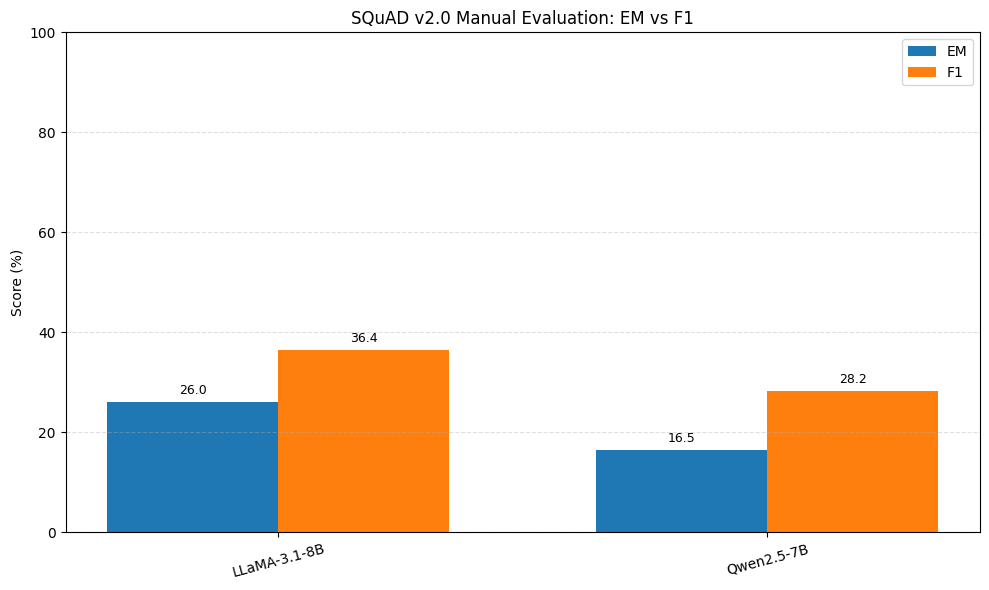

In [3]:
import os, json, re, string
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

results_dir = "results"
files = {
    "BERT": "squadv2_bert.jsonl",
    "RoBERTa": "squadv2_roberta.jsonl",
    "Qwen2.5-7B": "squadv2_qwen2.5-7B.jsonl",
    "LLaMA-3.1-8B": "squadv2_llama3.1_8B.jsonl"
}
csv_out = "squadv2_metrics_em_f1.csv"

def normalize_answer(s: str) -> str:
    if s is None:
        return ""
    s = s.lower()
    exclude = set(string.punctuation)
    s = "".join(ch for ch in s if ch not in exclude)
    s = re.sub(r"\b(a|an|the)\b", " ", s)
    s = " ".join(s.split())
    return s

def f1_score(prediction: str, ground_truth: str) -> float:
    pred = normalize_answer(prediction).split()
    gold = normalize_answer(ground_truth).split()
    if len(gold) == 0 and len(pred) == 0:
        return 1.0
    if len(gold) == 0 or len(pred) == 0:
        return 0.0
    common = defaultdict(int)
    for t in gold:
        common[t] += 1
    num_same = 0
    for t in pred:
        if common[t] > 0:
            num_same += 1
            common[t] -= 1
    if num_same == 0:
        return 0.0
    precision = num_same / len(pred)
    recall = num_same / len(gold)
    return 2 * precision * recall / (precision + recall)

def exact_match_score(prediction: str, ground_truth: str) -> int:
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                yield json.loads(line)

def evaluate_file(jsonl_path: str):
    total = 0
    em_sum = 0
    f1_sum = 0.0
    for ex in read_jsonl(jsonl_path):
        pred = ex.get("predicted_answer", "")
        gold = ex.get("gold_answer", "")
        em_sum += exact_match_score(pred, gold)
        f1_sum += f1_score(pred, gold)
        total += 1
    if total == 0:
        return {"exact": 0.0, "f1": 0.0, "total": 0}
    return {
        "exact": 100.0 * em_sum / total,
        "f1": 100.0 * (f1_sum / total),
        "total": total
    }

rows = []
for model, fname in files.items():
    path = os.path.join(results_dir, fname)
    if os.path.exists(path):
        res = evaluate_file(path)
        rows.append({"model": model, "EM": res["exact"], "F1": res["f1"], "total": res["total"]})
    else:
        rows.append({"model": model, "EM": None, "F1": None, "total": 0})

df = pd.DataFrame(rows)

plot_df = df.dropna(subset=["EM", "F1"]).copy()

# Sort by F1 desc for nicer comparison
if len(plot_df) > 0:
    plot_df = plot_df.sort_values(by="F1", ascending=False)

df.to_csv(csv_out, index=False)

plt.figure(figsize=(10, 6))

if len(plot_df) > 0:
    models = plot_df["model"].tolist()
    x = range(len(models))
    bar_width = 0.35

    em_scores = plot_df["EM"].tolist()
    f1_scores = plot_df["F1"].tolist()

    em_bars = plt.bar([i - bar_width/2 for i in x], em_scores, width=bar_width, label="EM")
    f1_bars = plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label="F1")

    plt.xticks(list(x), models, rotation=15)
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.title("SQuAD v2.0 Manual Evaluation: EM vs F1")

    # Add value labels on bars
    def autolabel(bars):
        for b in bars:
            h = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}", ha='center', va='bottom', fontsize=9)
    autolabel(em_bars)
    autolabel(f1_bars)

    # Light horizontal grid for readability
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend()
else:
    plt.text(0.5, 0.5, "No evaluable models found.\n(Check file paths.)", ha="center", va="center")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from transformers import pipeline

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]
chatbot = pipeline("text-generation", model="/export/home/cache/hub/models--mistralai--Mistral-7B-Instruct-v0.3")
chatbot(messages)


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL_PATH = "/export/home/cache/hub/unsloth-gemma-3-12b-it-offline"  

model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    dtype=torch.bfloat16,
    device_map="auto",
)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH, use_fast=True)

# If you need low VRAM, swap the load above for 4-bit:
# from transformers import BitsAndBytesConfig
# quant = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.bfloat16)
# model = AutoModelForCausalLM.from_pretrained(MODEL_PATH, quantization_config=quant, device_map="auto")

messages = [
    {"role": "system", "content": "You are a helpful, concise assistant."},
    {"role": "user", "content": "Give me three secure TLS config tips for production."},
]

# Use the model's chat template (Gemma has one)
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
with torch.inference_mode():
    outputs = model.generate(
        **inputs,
        max_new_tokens=256,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id,
    )

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Loading checkpoint shards: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


user
You are a helpful, concise assistant.

Give me three secure TLS config tips for production.
model
Okay, here are three secure TLS configuration tips for production:

1.  **Use TLS 1.3 Only:** Disable older, vulnerable protocols (TLS 1.2 and below). TLS 1.3 offers the best security and performance.
2.  **Strong Cipher Suites:** Prioritize modern, secure cipher suites (e.g., those using AES-GCM).  Exclude weak or deprecated ciphers.
3.  **Regularly Update Certificates:** Keep your TLS certificates and Certificate Authority (CA) root certificates updated to prevent vulnerabilities and maintain trust.



Hope this helps!


: 

In [ ]:
from openai import OpenAI

endpoint = "https://ailab-kent-cifre.openai.azure.com/openai/v1/"
model_name = "gpt-4o"
deployment_name = "gpt-4o"

api_key = ""

client = OpenAI(
    base_url=f"{endpoint}",
    api_key=api_key
)

completion = client.chat.completions.create(
    model=deployment_name,
    messages=[
        {
            "role": "user",
            "content": "What is the capital of France?",
        }
    ],
)

print(completion.choices[0].message)

ChatCompletionMessage(content='The capital of France is **Paris**.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)
